In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import time


# Import Dataset

In [3]:
df = pd.read_csv("csse_covid_19_daily_reports_us.csv")
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [5]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [6]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [7]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [8]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


# Checking Null Value

In [9]:
df.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

# Treating Null Value

In [10]:
# filling missing values with NA
df[['Lat']] = df[['Lat']].fillna('NA')

In [11]:
df[['Long_']] = df[['Long_']].fillna('NA')

In [12]:
df[['Recovered']] = df[['Recovered']].fillna('NA')

In [13]:
df[['People_Tested']] = df[['People_Tested']].fillna('NA')

In [14]:
df[['Incident_Rate']] = df[['Incident_Rate']].fillna('NA')

In [15]:
df[['People_Hospitalized']] = df[['People_Hospitalized']].fillna('NA')

In [16]:
df[['Mortality_Rate']] = df[['Mortality_Rate']].fillna('NA')

In [17]:
df[['Testing_Rate']] = df[['Testing_Rate']].fillna('NA')

In [18]:
df[['Hospitalization_Rate']] = df[['Hospitalization_Rate']].fillna('NA')

In [19]:
df.isna().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

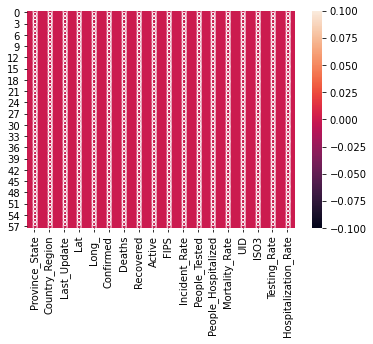

In [41]:
sns.heatmap(df.isnull(),annot=True)

# Checking Statistical information

In [20]:
df.describe()

,Confirmed,Deaths,Active,FIPS,UID
count,58.000000,58.000000,58.000000,58.000000,5.800000e+01
mean,26756.086207,1611.017241,20070.724138,3288.086207,7.676194e+07
std,52562.031122,4084.750891,41294.705318,17408.350591,2.378302e+07
min,0.000000,0.000000,0.000000,1.000000,1.600000e+01
25%,2596.000000,74.000000,812.500000,18.250000,8.400001e+07
50%,10148.500000,385.000000,5644.500000,32.500000,8.400003e+07
75%,29395.500000,1394.250000,19291.250000,47.750000,8.400004e+07
max,354370.000000,28636.000000,263848.000000,99999.000000,8.410000e+07


In [21]:
countries = df['Country_Region'].unique().tolist()
print(countries)

['US']


In [22]:
provinces_situation = df.groupby(['Country_Region', 'Province_State'])['Confirmed', 'Deaths', 'Recovered'].max()
provinces_situation.style.background_gradient(cmap='viridis')

<ipython-input-22-6354456c6d08>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  provinces_situation = df.groupby(['Country_Region', 'Province_State'])['Confirmed', 'Deaths', 'Recovered'].max()


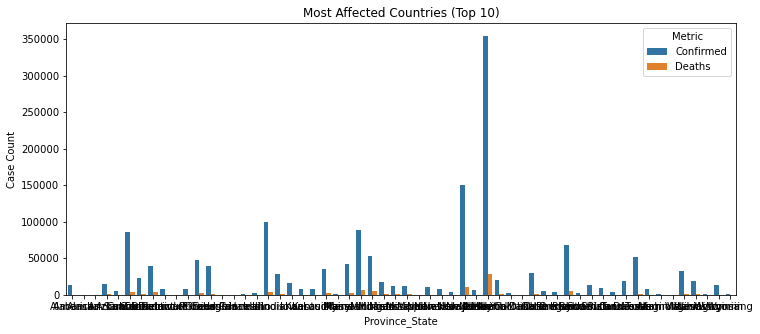

In [28]:
plot_data = pd.melt(df, id_vars = ['Province_State'],  value_vars=['Confirmed', 'Deaths'], 
                var_name='Metric', value_name='Case Count') # Plot Friendly Format
plt.figure(figsize=(12, 5))
sns.barplot(x="Province_State", hue="Metric", y="Case Count", data=plot_data)
plt.title('Most Affected Countries (Top 10)')
plt.show()

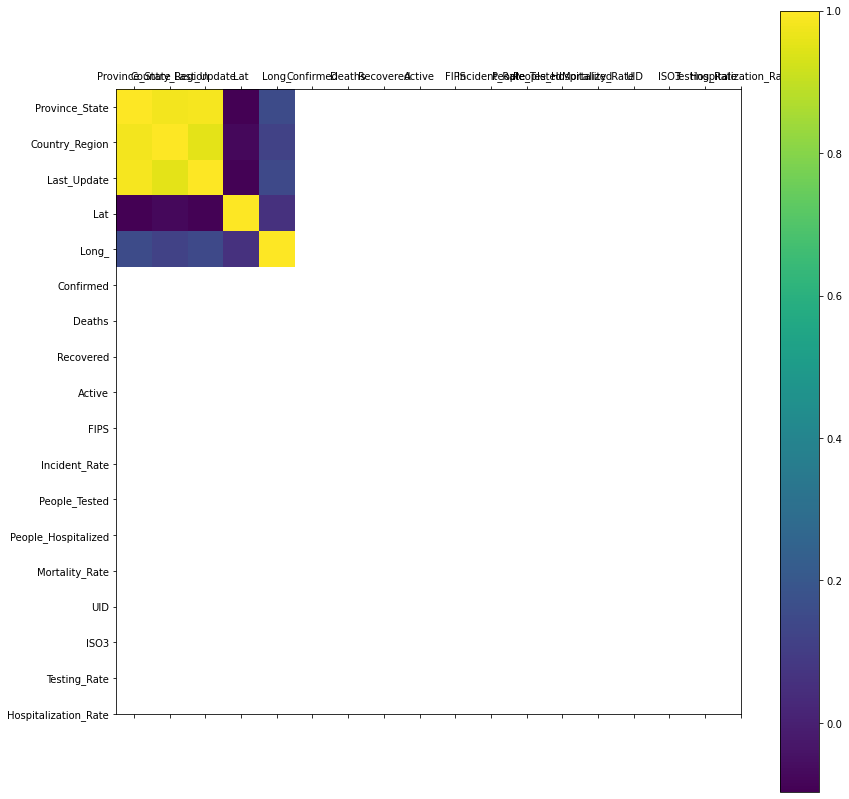

In [48]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002603947F100>,
      dtype=object)

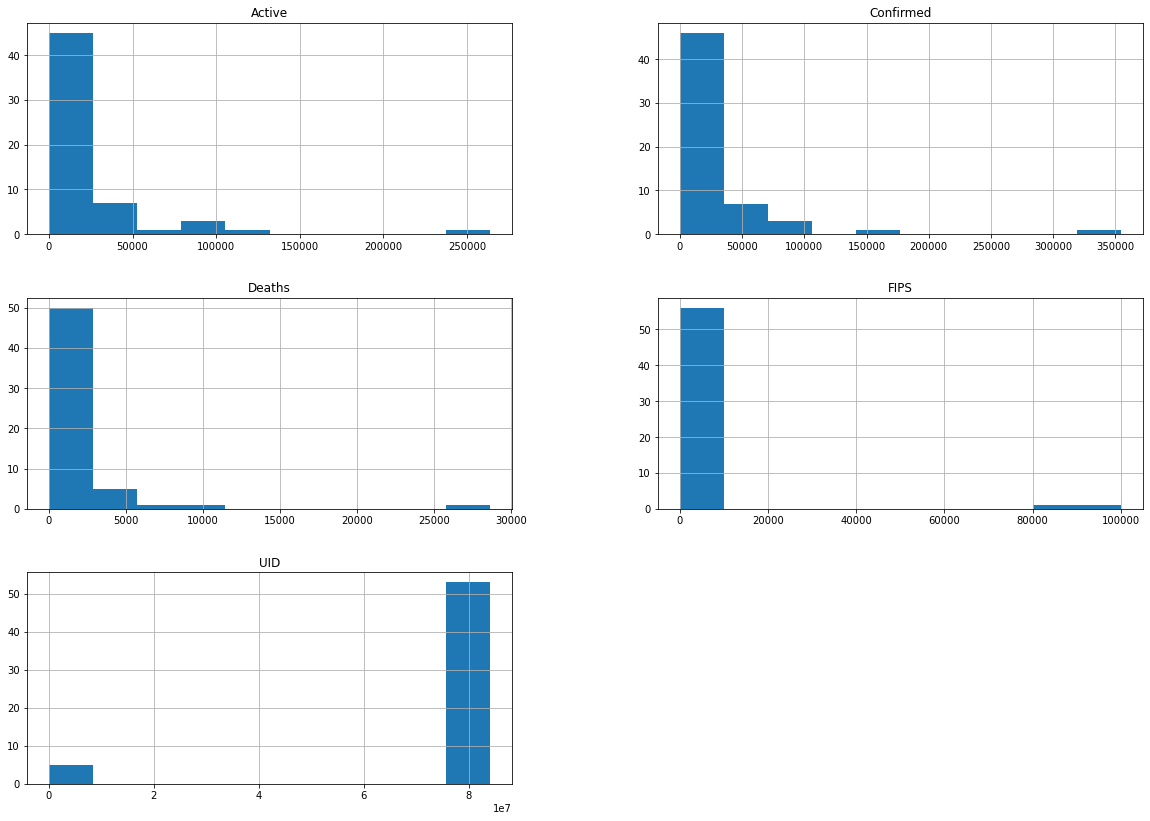

In [50]:
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

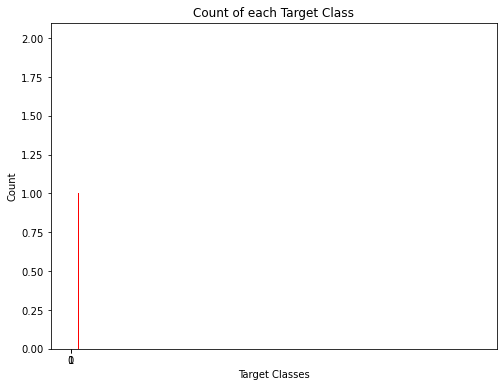

In [58]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['Deaths'].unique(), df['Deaths'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')